In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv('/content/netflix_cleaned.csv')

In [6]:
# descriptive statistics for numerical features

df.describe()

,release_year,year_added,month_added
count,8804.000000,8804.000000,8804.000000
mean,2014.180259,2018.874035,6.648455
std,8.820647,1.573353,3.440228
min,1925.000000,2008.000000,1.000000
25%,2013.000000,2018.000000,4.000000
50%,2017.000000,2019.000000,7.000000
75%,2019.000000,2020.000000,10.000000
max,2021.000000,2021.000000,12.000000


In [7]:
# Mode for categorical features

df['rating'].mode()[0]

'TV-MA'

              release_year  duration_num
release_year      1.000000     -0.249182
duration_num     -0.249182      1.000000


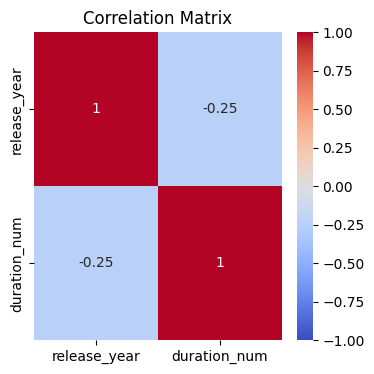

In [9]:
# Correlation Analysis

df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

corr_matrix = df[['release_year','duration_num']].corr()
print(corr_matrix)

plt.figure(figsize=(4,4))
plt.title(f'Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1,vmax=1)
plt.show()

In [14]:
# Hypothesis Testing

movie_duration = df[df['type'] == 'Movie']['duration_num'].dropna()

t_stat, p_value = stats.ttest_1samp(movie_duration, 100)
print(f"T-Statistics:{t_stat}, P-Value{p_value}","\nResult:")

alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: The average duration of movies is significantly different from 100 minutes.")
else:
   print("Fail to reject the null hypothesis: There is no significant difference from 100 minutes.")

T-Statistics:-1.169946431211949, P-Value0.24206803394773344 
Result:
Fail to reject the null hypothesis: There is no significant difference from 100 minutes.
